Time Series
Time series merupakan serangkaian pengamatan terhadap suatu peristiwa, kejadian, gejala atau perubahan yang terjadi dari waktu ke waktu. Sebagai contoh yaitu data yang dikumpulkan terkait dengan satuan waktu yaitu jam, hari, minggu, bulan, tahun, maupun semester dan data yang diamati sepanjang waktu. Pola data time series digunakan untuk menganalisis data masa lalu yang akan digunakan untuk meramalkan suatu nilai atau kejadian pada masa yang akan datang.

In [1]:
import sys
!{sys.executable} -m pip install pmdarima

  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [2]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [3]:
beras = pd.read_csv('D:/Supply_Beras.csv',index_col='Periode', parse_dates=True, sep = ';')
print(beras.shape)
print(beras.head())

(48, 1)
            Produksi
Periode             
2017-01-01    808181
2017-02-01    803341
2017-03-01    802040
2017-04-01    788637
2017-05-01    775817


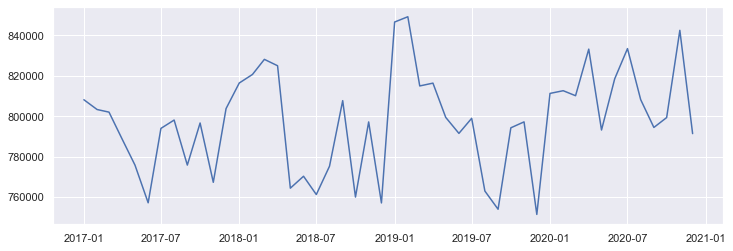

In [4]:
plt.figure(figsize=(12,4))
plt.plot(beras.index, beras['Produksi'])

In [5]:
train = beras[:40]
test = beras[40:]

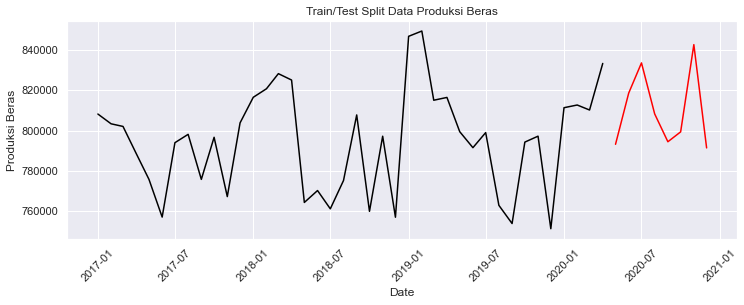

In [6]:
plt.figure(figsize=(12,4))
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Produksi Beras')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test Split Data Produksi Beras")
plt.show()

ARMA
Metode Autoregressive Moving Average (ARMA) memodelkan langkah berikutnya dalam urutan sebagai fungsi linier dari pengamatan dan kesalahan residual pada deret waktu sebelumnya. Metode ini menggabungkan kedua model Autoregression (AR) dan Moving Average (MA).

In [7]:
y = train['Produksi']
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()
y_pred_ARMA = ARMAmodel.get_forecast(15)
y_pred_df_ARMA = y_pred_ARMA.conf_int(alpha = 0.05) 
y_pred_df_ARMA["Predictions"] = ARMAmodel.predict(start = y_pred_df_ARMA.index[0], end = y_pred_df_ARMA.index[-1])
y_pred_out_ARMA = y_pred_df_ARMA["Predictions"] 

Implementasi Metode ARMA
Terlihat bahwa implementasi di bawah untuk memprediksi selama 15 waktu ke depan

In [8]:
#Mencetak dan memvisualisasikan hasil prediksi metode ARMA
y_pred_out_ARMA

2020-05-01    819427.120247
2020-06-01    819302.561245
2020-07-01    819178.021177
2020-08-01    819053.500041
2020-09-01    818928.997832
2020-10-01    818804.514548
2020-11-01    818680.050187
2020-12-01    818555.604746
2021-01-01    818431.178221
2021-02-01    818306.770610
2021-03-01    818182.381909
2021-04-01    818058.012117
2021-05-01    817933.661230
2021-06-01    817809.329245
2021-07-01    817685.016160
Freq: MS, Name: Predictions, dtype: float64

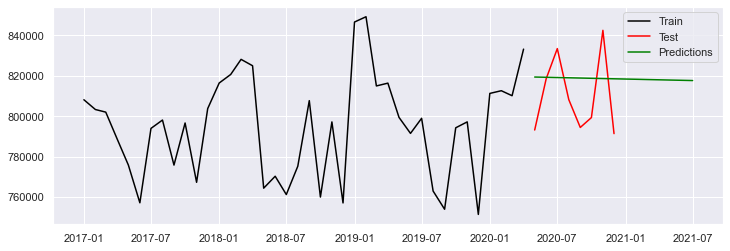

In [9]:
plt.figure(figsize=(12,4))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out_ARMA, color='green', label = 'Predictions')
plt.legend()

In [10]:
arma_rmse = np.sqrt(mean_squared_error(y_pred_df_ARMA["Predictions"].values, y_pred_df_ARMA["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.0


ARIMA
Metode Autoregressive Integrated Moving Average (ARIMA) memodelkan deret waktu berikutnya dalam urutan sebagai fungsi linier dari pengamatan yang berbeda dan kesalahan residual pada deret waktu sebelumnya. Metode ini menggabungkan kedua model Autoregression (AR) dan Moving Average (MA) serta langkah pra-pemrosesan diferensial dari urutan untuk membuat urutan stasioner, yang disebut integrasi (I).

In [11]:
ARIMAmodel = ARIMA(y, order = (1, 0, 1))
ARIMAmodel = ARIMAmodel.fit()

y_pred_ARIMA = ARIMAmodel.get_forecast(15)
y_pred_df_ARIMA = y_pred_ARIMA.conf_int(alpha = 0.05) 
y_pred_df_ARIMA["Predictions"] = ARIMAmodel.predict(start = y_pred_df_ARIMA.index[0], end = y_pred_df_ARIMA.index[-1])
y_pred_out_ARIMA = y_pred_df_ARIMA["Predictions"]

In [12]:
#cetak prediksi
y_pred_out_ARIMA

2020-05-01    806959.814624
2020-06-01    799727.294349
2020-07-01    796857.917128
2020-08-01    795719.541386
2020-09-01    795267.910517
2020-10-01    795088.733787
2020-11-01    795017.648521
2020-12-01    794989.446672
2021-01-01    794978.258077
2021-02-01    794973.819196
2021-03-01    794972.058146
2021-04-01    794971.359480
2021-05-01    794971.082297
2021-06-01    794970.972329
2021-07-01    794970.928701
Freq: MS, Name: Predictions, dtype: float64

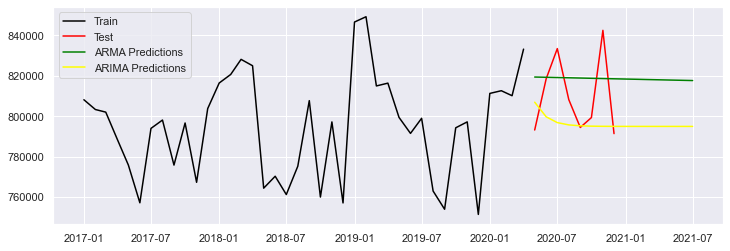

In [13]:
plt.figure(figsize=(12,4))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out_ARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.legend()

In [14]:
arima_rmse = np.sqrt(mean_squared_error(y_pred_df_ARMA["Predictions"].values, y_pred_df_ARIMA["Predictions"]))
print("RMSE: ",arima_rmse)

RMSE:  22434.82845191206


SARIMA
Seasonal Autoregressive Integrated Moving Average (SARIMA) merupakan pengembangan dari model Autoregressive Integrated Moving Average (ARIMA) padadata runtun waktu yang memiliki pola musiman.

In [15]:
#Implementasi SARIMA
SARIMAXmodel = SARIMAX(y, order = (1, 0, 1), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred_SARIMA = SARIMAXmodel.get_forecast(15)
y_pred_df_SARIMA = y_pred_SARIMA.conf_int(alpha = 0.05) 
y_pred_df_SARIMA["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_SARIMA.index[0], end = y_pred_df_SARIMA.index[-1])
y_pred_out_SARIMA = y_pred_df_SARIMA["Predictions"] 

In [16]:
y_pred_out_SARIMA

2020-05-01    784928.549692
2020-06-01    776382.241012
2020-07-01    786171.096182
2020-08-01    738465.671334
2020-09-01    727266.141815
2020-10-01    783614.479483
2020-11-01    788457.395776
2020-12-01    728546.889605
2021-01-01    730026.354912
2021-02-01    733163.741026
2021-03-01    732930.888876
2021-04-01    765949.115774
2021-05-01    709263.184774
2021-06-01    701071.704782
2021-07-01    711996.467447
Freq: MS, Name: Predictions, dtype: float64

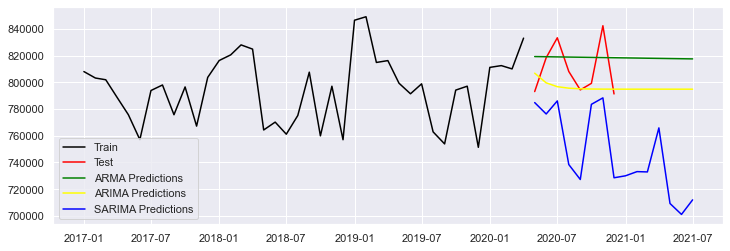

In [17]:
plt.figure(figsize=(12,4))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out_ARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_SARIMA, color='Blue', label = 'SARIMA Predictions')
plt.legend()

In [18]:
sarima_rmse = np.sqrt(mean_squared_error(y_pred_df_ARMA["Predictions"].values, y_pred_df_SARIMA["Predictions"]))
print("SARIMA RMSE: ",sarima_rmse)

SARIMA RMSE:  77857.33664229562
